In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# % matplotlib inline
# plt.style.use('fivethirtyeight')

from sklearn import preprocessing
from sklearn.decomposition import PCA, FastICA
seed =45
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.svm import SVR
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import TruncatedSVD

In [2]:
mercedes = pd.read_csv('train (1).csv')
test_data = pd.read_csv('test.csv')

In [3]:
print('Train dataset shape', mercedes.shape)
print('Test dataset shape',test_data.shape)

Train dataset shape (4209, 378)
Test dataset shape (4209, 377)


In [4]:
mercedes.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test_data.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [6]:
# Checking if any of the rows in the given dataset has any missing(NaN) values  
mercedes.shape[0] - mercedes.dropna().shape[0]

0

In [7]:
mercedes.isnull().sum()

ID      0
y       0
X0      0
X1      0
X2      0
X3      0
X4      0
X5      0
X6      0
X8      0
X10     0
X11     0
X12     0
X13     0
X14     0
X15     0
X16     0
X17     0
X18     0
X19     0
X20     0
X21     0
X22     0
X23     0
X24     0
X26     0
X27     0
X28     0
X29     0
X30     0
       ..
X355    0
X356    0
X357    0
X358    0
X359    0
X360    0
X361    0
X362    0
X363    0
X364    0
X365    0
X366    0
X367    0
X368    0
X369    0
X370    0
X371    0
X372    0
X373    0
X374    0
X375    0
X376    0
X377    0
X378    0
X379    0
X380    0
X382    0
X383    0
X384    0
X385    0
Length: 378, dtype: int64

In [8]:
train_data = mercedes.copy()

In [9]:
train_y = mercedes['y']

In [10]:
train_data.drop(['y'],axis=1, inplace=True)

In [11]:
train_data.describe()

,ID,X10,X11,X12,X13,X14,X15,X16,X17,X18,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4205.960798,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,0.007840,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,2437.608688,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,0.088208,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4220.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6314.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8417.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
train_data.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,k,v,at,a,d,u,j,o,0,...,0,0,1,0,0,0,0,0,0,0
1,6,k,t,av,e,d,y,l,o,0,...,1,0,0,0,0,0,0,0,0,0
2,7,az,w,n,c,d,x,j,x,0,...,0,0,0,0,0,0,1,0,0,0
3,9,az,t,n,f,d,x,l,e,0,...,0,0,0,0,0,0,0,0,0,0
4,13,az,v,n,f,d,h,d,n,0,...,0,0,0,0,0,0,0,0,0,0


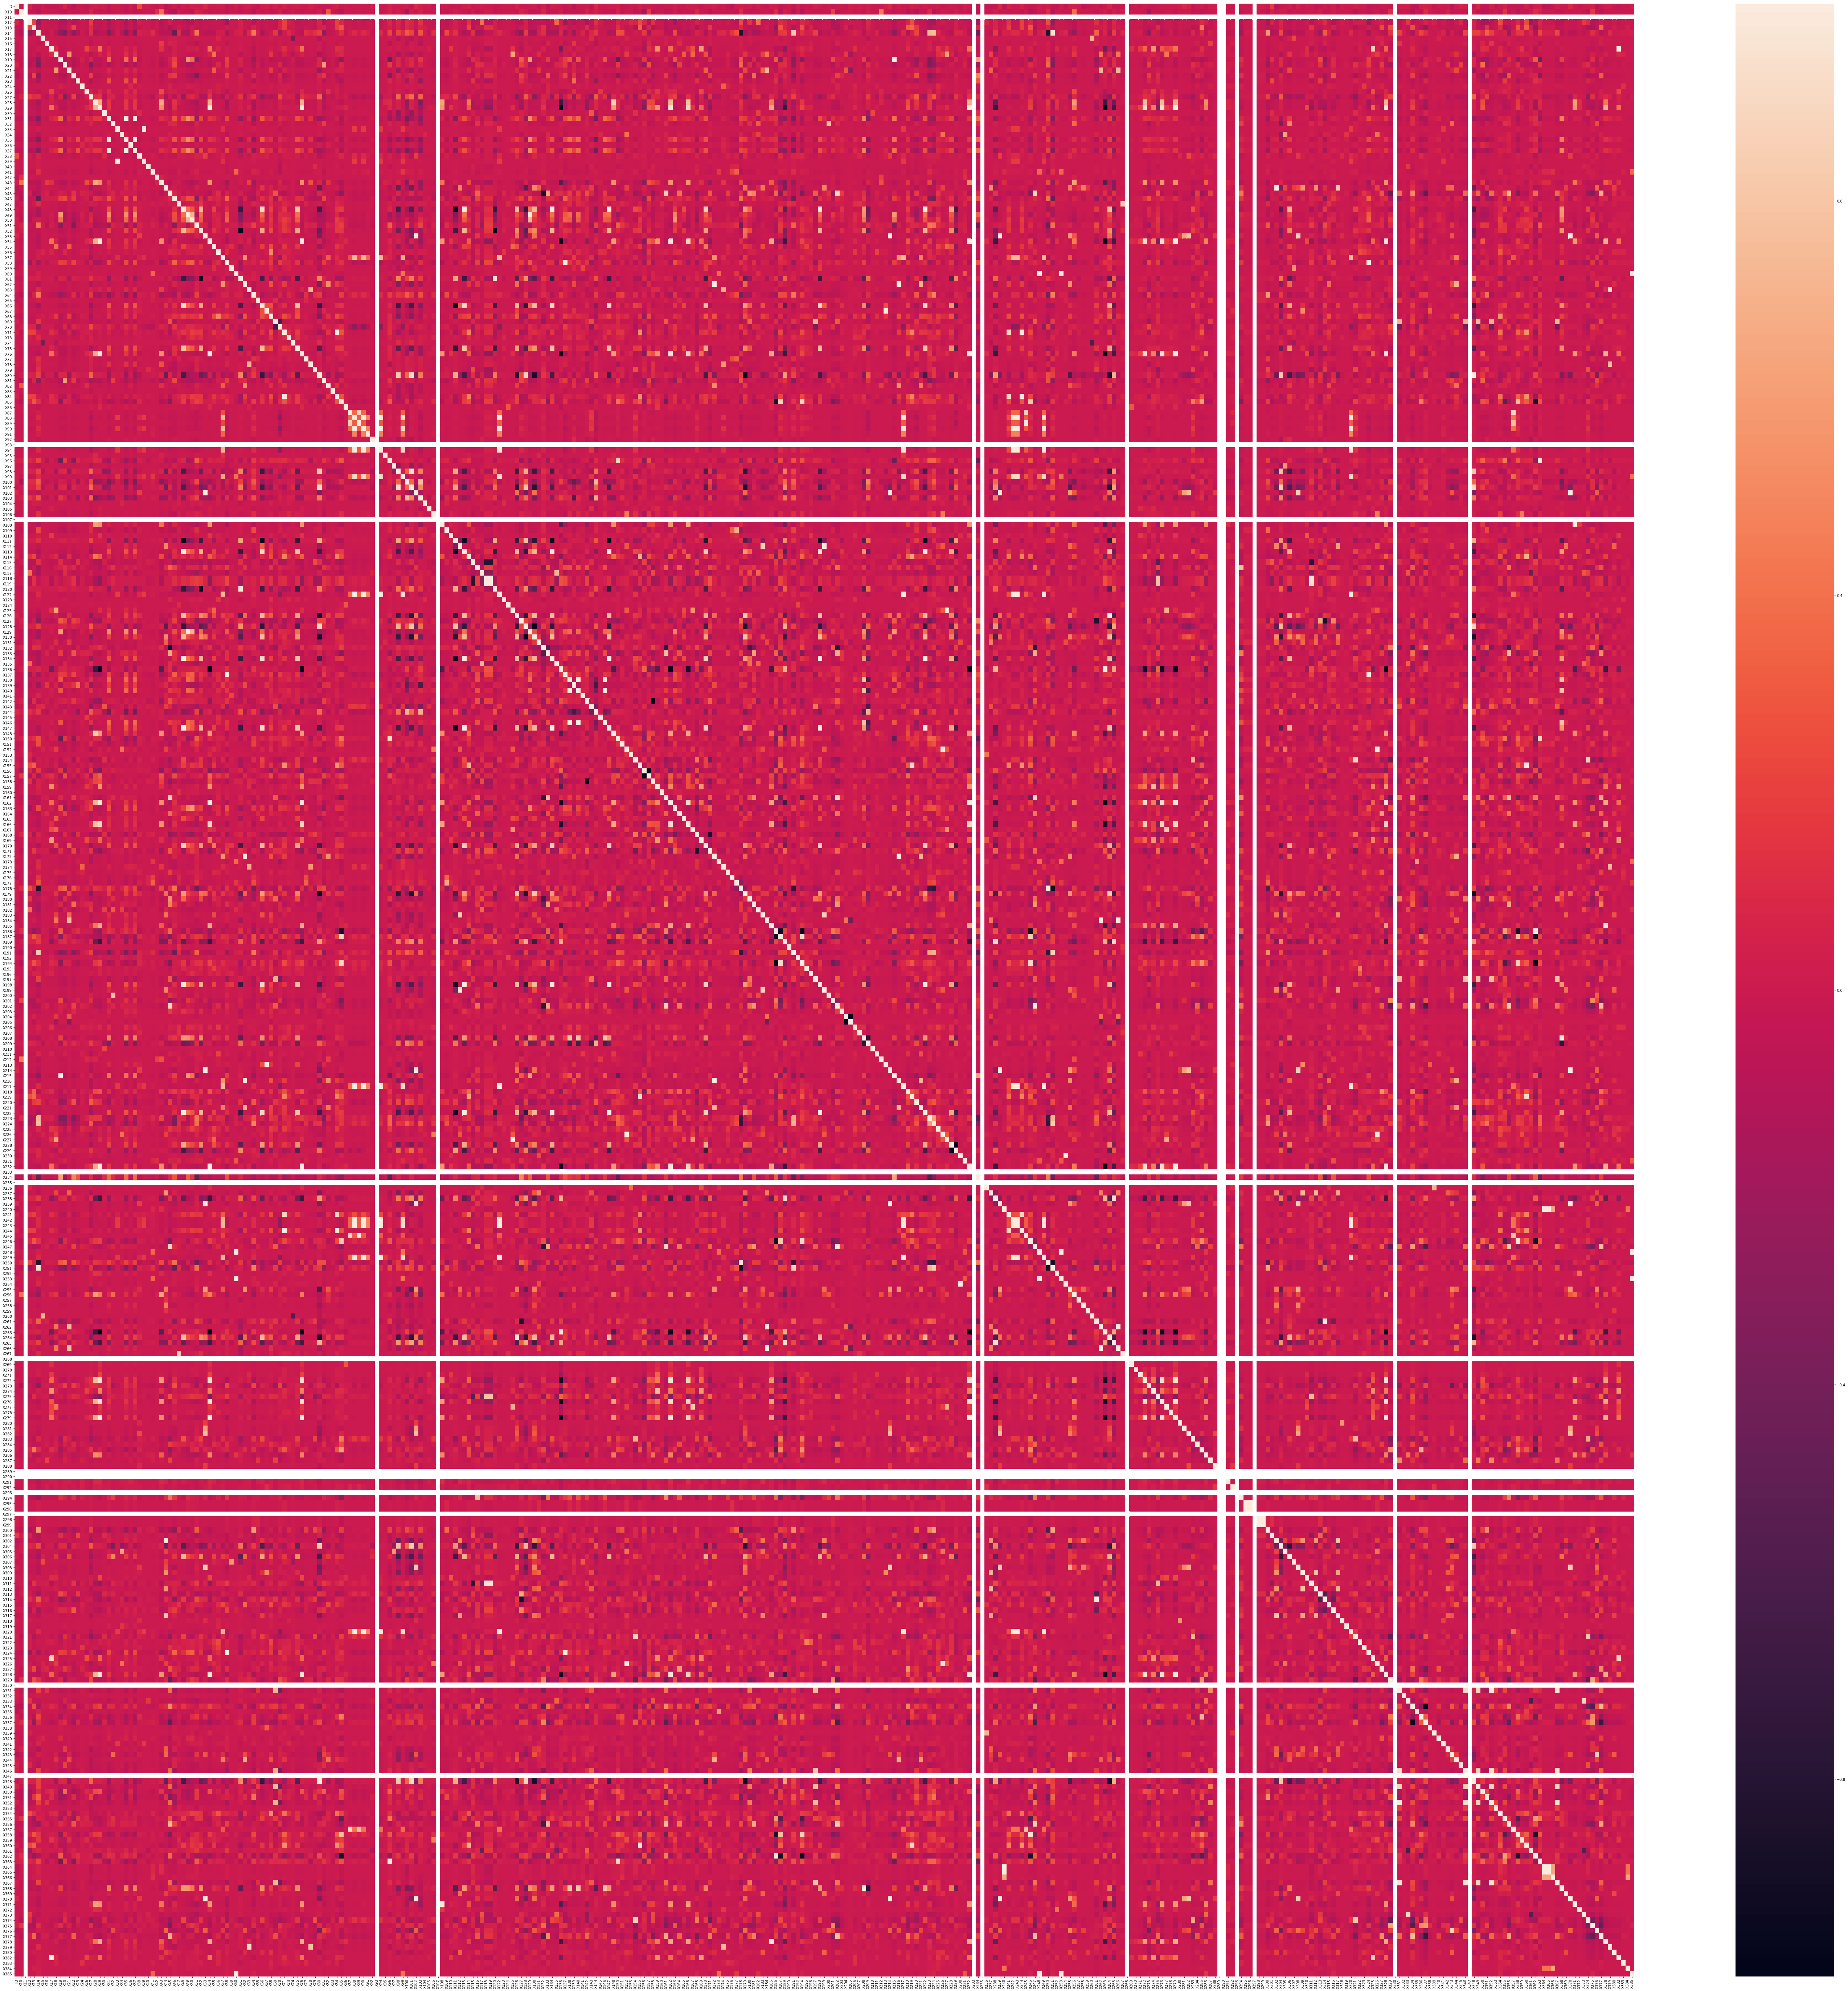

In [13]:
plt.figure(figsize=(100,100))
sns.heatmap(train_data.corr())

In [14]:
train_data.corr()

,ID,X10,X11,X12,X13,X14,X15,X16,X17,X18,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
ID,1.000000,0.001602,NaN,0.058988,-0.031917,-0.025438,0.002237,-0.036480,-0.038171,-0.027063,...,0.045229,-0.080259,-0.022965,0.030371,0.023382,-0.013577,-0.038171,-0.009332,-0.015355,0.029059
X10,0.001602,1.000000,NaN,-0.033084,-0.028806,-0.100474,-0.002532,-0.005944,-0.010164,-0.010323,...,0.165277,-0.028618,-0.074244,-0.016870,-0.011374,-0.010479,-0.010164,-0.004740,-0.002532,-0.004387
X11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X12,0.058988,-0.033084,NaN,1.000000,0.214825,-0.246513,-0.006212,-0.014584,-0.024937,-0.025327,...,-0.107864,-0.070214,0.030134,-0.016043,-0.027907,-0.005566,-0.024937,-0.011628,-0.006212,-0.010765
X13,-0.031917,-0.028806,NaN,0.214825,1.000000,-0.083141,-0.005409,-0.012698,-0.021713,-0.010525,...,-0.169721,-0.061136,0.357229,-0.036040,-0.024299,0.023045,-0.021713,-0.010125,0.041242,-0.009373
X14,-0.025438,-0.100474,NaN,-0.246513,-0.083141,1.000000,-0.018865,-0.044291,0.012713,-0.076916,...,0.118950,0.026496,-0.097464,-0.037958,0.103309,0.007743,0.012713,0.023604,0.025199,0.043667
X15,0.002237,-0.002532,NaN,-0.006212,-0.005409,-0.018865,1.000000,-0.001116,-0.001908,-0.001938,...,-0.014917,-0.005373,0.032168,-0.003168,-0.002136,-0.001968,-0.001908,-0.000890,-0.000475,-0.000824
X16,-0.036480,-0.005944,NaN,-0.014584,-0.012698,-0.044291,-0.001116,1.000000,-0.004480,-0.004550,...,-0.025036,-0.012615,0.045461,-0.007437,-0.005014,-0.004619,-0.004480,-0.002089,-0.001116,-0.001934
X17,-0.038171,-0.010164,NaN,-0.024937,-0.021713,0.012713,-0.001908,-0.004480,1.000000,0.085256,...,-0.059883,-0.021571,-0.059327,-0.012716,-0.008573,-0.007899,1.000000,-0.003572,-0.001908,-0.003307
X18,-0.027063,-0.010323,NaN,-0.025327,-0.010525,-0.076916,-0.001938,-0.004550,0.085256,1.000000,...,0.037446,-0.021908,-0.013853,0.043885,-0.008707,-0.008022,0.085256,0.062481,-0.001938,-0.003359


In [15]:
train_data.info()
train_data.drop(['X11','X93','X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293','X297', 'X330', 'X347'],axis=1, inplace=True)
print ('')
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 377 entries, ID to X385
dtypes: int64(369), object(8)
memory usage: 12.1+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 365 entries, ID to X385
dtypes: int64(357), object(8)
memory usage: 11.7+ MB


In [16]:
test_data.info()
test_data.drop(['X11','X93','X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293','X297', 'X330', 'X347'],axis=1, inplace=True)
print('')
test_data.info()
test_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 377 entries, ID to X385
dtypes: int64(369), object(8)
memory usage: 12.1+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 365 entries, ID to X385
dtypes: int64(357), object(8)
memory usage: 11.7+ MB


,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


*Here-on will combine both the dataset, create One Hot Encoding for columns in different format

In [17]:
# # Combine both the dataset
# train_data = train_data.drop(['y','ID'],axis=1)
# train_len = train_data.shape[0]
# # train_data.reset_index(drop=1, inplace=True) 
# # test_data.reset_index(drop=1, inplace=True) 
# #combine_df = pd.concat([train_data,test_data],axis=0, sort=False)

In [18]:
def one_hot(train_data,test_data,columns):

    for i,column in enumerate(columns):
        Xtrain = train_data[str(column)].T
        Xtest = test_data[str(column)].T

        # train_df
        lb= preprocessing.LabelBinarizer()
        lb.fit(Xtrain)
        X_classes = len(lb.classes_)
        Xenc = lb.transform(Xtrain)
        Xtrain_enc = pd.DataFrame(data = Xenc, columns = lb.classes_)
        train_data.drop([str(column)], axis =1, inplace=True)

        # test_df
        Xenc = lb.transform(Xtest)
        Xtest_enc = pd.DataFrame(data = Xenc, columns = lb.classes_)
        test_data.drop([str(column)], axis =1, inplace=True)

        print('Number of classes in '+str(column)+ ' = '+ str(X_classes))
        train_data = pd.concat((train_data,Xtrain_enc),axis=1)
        test_data = pd.concat((test_data,Xtest_enc),axis=1) 
    return train_data,test_data

In [19]:
train_data , test_data = one_hot(train_data,test_data,['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'])

Number of classes in X0 = 47
Number of classes in X1 = 27
Number of classes in X2 = 44
Number of classes in X3 = 7
Number of classes in X4 = 4
Number of classes in X5 = 29
Number of classes in X6 = 12
Number of classes in X8 = 25


In [20]:
train_data.info()
print ('')
train_data.head()
train_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 552 entries, ID to y
dtypes: int32(195), int64(357)
memory usage: 14.6 MB



,ID,X10,X12,X13,X14,X15,X16,X17,X18,X19,...,p,q,r,s,t,u,v,w,x,y
count,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4205.960798,0.013305,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,0.007840,0.099549,...,0.023759,0.027798,0.052031,0.060584,0.028273,0.028273,0.046092,0.046567,0.024947,0.027560
std,2437.608688,0.114590,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,0.088208,0.299433,...,0.152314,0.164412,0.222117,0.238595,0.165771,0.165771,0.209709,0.210734,0.155981,0.163728
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4220.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6314.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8417.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
test_data.info()
print ('')
test_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 552 entries, ID to y
dtypes: int32(195), int64(357)
memory usage: 14.6 MB



,ID,X10,X12,X13,X14,X15,X16,X17,X18,X19,...,p,q,r,s,t,u,v,w,x,y
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,3,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
# vif = pd.DataFrame()
# vif["VIF Factor"] = [variance_inflation_factor(train_data.values, i) for i in range(train_data.shape[1])]
# vif["features"] = train_data.columns
# vif

# PCA

In [23]:
pca = PCA(random_state=seed)
pca.fit(train_data)
pca_train = pca.transform(train_data)
pca_test = pca.transform(test_data)

# Truncated SVD

In [24]:
n_comp = 350
tsvd = TruncatedSVD(n_components=n_comp, random_state=420)
tsvd.fit(train_data)
tsvd_train = tsvd.transform(train_data)
tsvd_test = tsvd.transform(test_data)

# Independent Component Analysis 

In [25]:
ica = FastICA(n_components=n_comp, random_state=420)
ica.fit(train_data)
ica_train = ica.transform(train_data)
ica_test = ica.transform(test_data)

In [26]:
X = ica_train
y = train_y
X.shape,y.shape

((4209, 350), (4209,))

# Recursive Feature Selection 

In [27]:
# # Create the RFE object and rank each pixel
# svr = SVR(kernel="linear")
# rfe = RFE(estimator=svr, n_features_to_select=1, step=1)
# rfe.fit(X, y)

In [28]:
# rfe.ranking_

In [29]:
# rfe.score(X,y)

In [30]:
# rfe.predict(X)

# Linear Regression

In [31]:
kf = KFold(n_splits=10,random_state=seed,shuffle=True)
R2_avg=0
MSE_avg=0
i=1
for train_index,test_index in kf.split(X,y):    
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    x_tr,x_vl = X[train_index], X[test_index]
    y_tr,y_vl = y[train_index], y[test_index]
    
    lr = LinearRegression()
    lr.fit(x_tr, y_tr)
    pred_test = lr.predict(x_vl)
    r_square = lr.score(x_vl,y_vl)
    print('R square score',r_square)
    MSE = mse(y_vl,pred_test)
    print('Mean Square Error ',MSE)
    R2_avg = R2_avg + r_square
    MSE_avg = MSE_avg + MSE
    i+=1
R2_avg = R2_avg/10
print('Average R_Square for Linear Regreesion model =',R2_avg)
MSE_avg = MSE_avg/10
print('Average MSE for Linear Regreesion model =',MSE_avg)


1 of kfold 10
R square score 0.43768147426922605
Mean Square Error  82.1514137817521

2 of kfold 10
R square score 0.4812734134971135
Mean Square Error  85.02382358360387

3 of kfold 10
R square score 0.6133824800081804
Mean Square Error  47.47526892778583

4 of kfold 10
R square score 0.5679645721182038
Mean Square Error  60.629692552298316

5 of kfold 10
R square score 0.5957754126482884
Mean Square Error  64.2797137724015

6 of kfold 10
R square score 0.5491389163194431
Mean Square Error  73.338016618196

7 of kfold 10
R square score 0.5333563599291036
Mean Square Error  75.31353580861071

8 of kfold 10
R square score 0.12738840259247586
Mean Square Error  145.12773420457054

9 of kfold 10
R square score 0.2142765447892355
Mean Square Error  173.07073144689514

10 of kfold 10
R square score 0.5066942291428334
Mean Square Error  78.31915804058018
Average R_Square for Linear Regreesion model = 0.46269318053141034
Average MSE for Linear Regreesion model = 88.47290887366941


# Ridge Regression

In [32]:
kf = KFold(n_splits=10,random_state=seed,shuffle=True)
R2_avg=0
MSE_avg=0
i=1
for train_index,test_index in kf.split(X,y):    
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    x_tr,x_vl = X[train_index], X[test_index]
    y_tr,y_vl = y[train_index], y[test_index]
    
    ridreg = Ridge()
    ridreg.fit(x_tr, y_tr)
    pred_test = ridreg.predict(x_vl)
    r_square = ridreg.score(x_vl,y_vl)
    print('R square score',r_square)
    MSE = mse(y_vl,pred_test)
    print('Mean Square Error ',MSE)
    R2_avg = R2_avg + r_square
    MSE_avg = MSE_avg + MSE
    i+=1
R2_avg = R2_avg/10
print('Average R_Square for Ridge Regreesion model =',R2_avg)
MSE_avg = MSE_avg/10
print('Average MSE for Ridge Regreesion model =',MSE_avg)


1 of kfold 10
R square score 0.44533754755906163
Mean Square Error  81.03290671503342

2 of kfold 10
R square score 0.3528332290847469
Mean Square Error  106.07629296664722

3 of kfold 10
R square score 0.4639591195877998
Mean Square Error  65.82393098583519

4 of kfold 10
R square score 0.4238001479969543
Mean Square Error  80.8610072717984

5 of kfold 10
R square score 0.41302239016148856
Mean Square Error  93.34106319069288

6 of kfold 10
R square score 0.39752865142804716
Mean Square Error  97.99926268389582

7 of kfold 10
R square score 0.4031813584619254
Mean Square Error  96.32301454680756

8 of kfold 10
R square score 0.3943346768708913
Mean Square Error  100.73076760972316

9 of kfold 10
R square score 0.23491048571253068
Mean Square Error  168.52570835442705

10 of kfold 10
R square score 0.37198798050228776
Mean Square Error  99.70565015073895
Average R_Square for Ridge Regreesion model = 0.39008955873657336
Average MSE for Ridge Regreesion model = 99.04196044755996


In [33]:
kf = KFold(n_splits=10,random_state=seed,shuffle=True)
R2_avg=0
MSE_avg=0
i=1
for train_index,test_index in kf.split(X,y):    
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    x_tr,x_vl = X[train_index], X[test_index]
    y_tr,y_vl = y[train_index], y[test_index]
    
    lasso = linear_model.Lasso(alpha=0.001)
    lasso.fit(x_tr, y_tr)
    pred_test = lasso.predict(x_vl)
    r_square = lasso.score(x_vl,y_vl)
    print('R square score',r_square)
    MSE = mse(y_vl,pred_test)
    print('Mean Square Error ',MSE)
    R2_avg = R2_avg + r_square
    MSE_avg = MSE_avg + MSE
    i+=1
R2_avg = R2_avg/10
print('Average R_Square for Lasso model =',R2_avg)
MSE_avg = MSE_avg/10
print('Average MSE for lasso model =',MSE_avg)


1 of kfold 10
R square score 0.6136341160614343
Mean Square Error  56.44577254740172

2 of kfold 10
R square score 0.45458416396102475
Mean Square Error  89.39842496934287

3 of kfold 10
R square score 0.6295988166269448
Mean Square Error  45.48395994102385

4 of kfold 10
R square score 0.5791110556718535
Mean Square Error  59.065450762659886

5 of kfold 10
R square score 0.586865323066531
Mean Square Error  65.69659445191216

6 of kfold 10
R square score 0.5607167655226113
Mean Square Error  71.45473920082964

7 of kfold 10
R square score 0.5500467737464747
Mean Square Error  72.61980129525887

8 of kfold 10
R square score 0.5461454325493035
Mean Square Error  75.48247723065053

9 of kfold 10
R square score 0.3038039466645367
Mean Square Error  153.3505960425852

10 of kfold 10
R square score 0.5045591894390422
Mean Square Error  78.65812531374542
Average R_Square for Lasso model = 0.5329065583309756
Average MSE for lasso model = 76.76559417554101


In [34]:
kf = KFold(n_splits=10,random_state=seed,shuffle=True)
R2_avg=0
MSE_avg=0
i=1
for train_index,test_index in kf.split(X,y):    
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    x_tr,x_vl = X[train_index], X[test_index]
    y_tr,y_vl = y[train_index], y[test_index]
    
    dtr = DecisionTreeRegressor(random_state=1)
    dtr.fit(x_tr, y_tr)
    pred_test = dtr.predict(x_vl)
    r_square = dtr.score(x_vl,y_vl)
    print('R square score',r_square)
    MSE = mse(y_vl,pred_test)
    print('Mean Square Error ',MSE)
    R2_avg = R2_avg + r_square
    MSE_avg = MSE_avg + MSE
    i+=1
R2_avg = R2_avg/10
print('Average R_Square for Decision Tree Regreesion model=',R2_avg)
MSE_avg = MSE_avg/10
print('Average MSE for Decision Tree Regreesion model =',MSE_avg)


1 of kfold 10
R square score 0.10114049463917242
Mean Square Error  131.3180622327791

2 of kfold 10
R square score -0.13197008313242775
Mean Square Error  185.53979524940618

3 of kfold 10
R square score -0.10782949092241956
Mean Square Error  136.0375572446556

4 of kfold 10
R square score -0.126761767850186
Mean Square Error  158.12411472684084

5 of kfold 10
R square score -0.14382998527672153
Mean Square Error  181.8916175771972

6 of kfold 10
R square score 0.012431646112845529
Mean Square Error  160.63995534441807

7 of kfold 10
R square score -0.04096285299964597
Mean Square Error  168.00527505938246

8 of kfold 10
R square score -0.04215567197473935
Mean Square Error  173.32532802850355

9 of kfold 10
R square score -0.10903990547522535
Mean Square Error  244.2874097387173

10 of kfold 10
R square score 0.011531746014637356
Mean Square Error  156.933095
Average R_Square for Decision Tree Regreesion model= -0.057744587086471025
Average MSE for Decision Tree Regreesion model = 

In [35]:
kf = KFold(n_splits=10,random_state=seed,shuffle=True)
R2_avg=0
MSE_avg=0
i=1
for train_index,test_index in kf.split(X,y):    
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    x_tr,x_vl = X[train_index], X[test_index]
    y_tr,y_vl = y[train_index], y[test_index]
    
    knn = KNeighborsRegressor(n_neighbors=20,weights='uniform',p=2)
    knn.fit(x_tr, y_tr)
    pred_test = knn.predict(x_vl)
    r_square = knn.score(x_vl,y_vl)
    print('R square score',r_square)
    MSE = mse(y_vl,pred_test)
    print('Mean Square Error ',MSE)
    R2_avg = R2_avg + r_square
    MSE_avg = MSE_avg + MSE
    i+=1
R2_avg = R2_avg/10
print('Average R_Square for KNN Regreesion model=',R2_avg)
MSE_avg = MSE_avg/10
print('Average MSE for KNN Regreesion model =',MSE_avg)


1 of kfold 10
R square score 0.4222169707807607
Mean Square Error  84.41068635926368

2 of kfold 10
R square score 0.3398529673489201
Mean Square Error  108.20387137232778

3 of kfold 10
R square score 0.4226099361019584
Mean Square Error  70.90146499406177

4 of kfold 10
R square score 0.39212402153385206
Mean Square Error  85.3062765362233

5 of kfold 10
R square score 0.3462215733361934
Mean Square Error  103.96371584382425

6 of kfold 10
R square score 0.37146236643438135
Mean Square Error  102.23925968349168

7 of kfold 10
R square score 0.31131473009096744
Mean Square Error  111.14974743527318

8 of kfold 10
R square score 0.36831065600309143
Mean Square Error  105.05893284916867

9 of kfold 10
R square score 0.15120735007804176
Mean Square Error  186.96293688895486

10 of kfold 10
R square score 0.3059539816967538
Mean Square Error  110.18946666785716
Average R_Square for KNN Regreesion model= 0.34312745534049205
Average MSE for KNN Regreesion model = 106.83863586304464


In [36]:
106.83863586304464

106.83863586304464

# Grid SearchCV - Linear Regression 

In [37]:
model = LinearRegression(normalize=True) 
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
lr_grid = GridSearchCV(model,parameters, cv=10)
lr_grid.fit(X, y)
print(lr_grid)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'fit_intercept': [True, False], 'normalize': [True, False], 'copy_X': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)


C:\Users\RUCHI\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [38]:
print(lr_grid.best_score_)

-3628.6335959132325


In [39]:
lr_grid.estimator

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [40]:
print(lr_grid.best_params_)

{'copy_X': True, 'fit_intercept': True, 'normalize': False}


# Grid SearchCV - Ridge Regression 

In [41]:
alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
fit_interceptOptions = ([True, False])
solverOptions = (['svd', 'cholesky', 'sparse_cg', 'sag'])
#create and fit a ridge regression model, testing each alpha
model = Ridge(normalize=True) 
reg_grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas, fit_intercept=fit_interceptOptions, solver=solverOptions))
reg_grid.fit(X, y)
print(reg_grid)

C:\Users\RUCHI\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 0.e+00]), 'fit_intercept': [True, False], 'solver': ['svd', 'cholesky', 'sparse_cg', 'sag']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)


In [42]:
# Summary the results of the grid search
print(reg_grid.best_score_)

0.21706901525632008


In [43]:
print(reg_grid.best_estimator_.alpha)

1.0


# Prediction

In [44]:
X_train = ica_train
X_test = ica_test
y_train =train_y

# Linear Prediction

In [45]:
lr = LinearRegression()
lr.fit(X_train, y_train) 
lr_predicted = lr.predict(X_test)

In [46]:
print (lr_predicted)

[101.02434717 112.37844803 103.71960783 ...  91.37867719 109.53858872
  91.23310817]


In [47]:
lr_accuracy = lr.score(X_train,y_train)
lr_accuracy

0.616514781840521

In [48]:
# lr_predict = pd.DataFrame({'ID':test_data['ID'],'y':lr_predicted})
# lr_predict.to_csv('lr_predict.csv',index=False) 

# Ridge Prediction

In [49]:
ridreg = Ridge(reg_grid.best_params_['alpha'])
ridreg.fit(X_train, y_train) 
Reg_predicted = ridreg.predict(X_test)

In [50]:
print (Reg_predicted)

[100.84683265 106.52388308 102.19446298 ...  96.02399766 105.10395342
  95.95121315]


In [51]:
Reg_accuracy = lr.score(X_train,y_train)
Reg_accuracy

0.616514781840521

In [52]:
# reg_predict = pd.DataFrame({'ID':test_data['ID'],'y':Reg_predicted})
# reg_predict.to_csv('reg_predict.csv',index=False) 

# Decision Tree Regressor Model Prediction

In [53]:
dtr = DecisionTreeRegressor(random_state=1)
dtr.fit(X_train, y_train) 
dtr_predicted = dtr.predict(X_test)

In [54]:
print (dtr_predicted)

[ 74.99 112.26  84.15 ... 108.94 101.18  93.39]


In [55]:
dtr_accuracy = dtr.score(X_train,y_train)
dtr_accuracy

1.0

In [56]:
# dtr_predict = pd.DataFrame({'ID':test_data['ID'],'y':dtr_predicted})
# dtr_predict.to_csv('dtr_predict.csv',index=False) 

# Lasso Regression Model Prediction

In [57]:
lasso = linear_model.Lasso(alpha=0.001)
lasso.fit(X_train, y_train) 
lasso_predicted = lasso.predict(X_test)

In [58]:
print (lasso_predicted)

[ 97.37091227 109.07560914  99.71615982 ...  93.2178564  109.74751844
  92.16454319]


In [59]:
lasso_accuracy = lasso.score(X_train,y_train)
lasso_accuracy

0.608154295058838

In [60]:
# lasso_predict = pd.DataFrame({'ID':test_data['ID'],'y':lasso_predicted})
# lasso_predict.to_csv('lasso_predict.csv',index=False) 

# KNN 

In [61]:
knn = knn = KNeighborsRegressor(n_neighbors=20,weights='uniform',p=2)
knn.fit(X_train, y_train) 
knn_predicted = knn.predict(X_test)

In [62]:
print (knn_predicted)

[ 82.9155  98.4595  97.249  ...  97.569  102.268   94.425 ]


In [63]:
knn_accuracy = knn.score(X_train,y_train)
knn_accuracy

0.4117851657682731

In [64]:
# knn_predict = pd.DataFrame({'ID':test_data['ID'],'y':knn_predicted})
# knn_predict.to_csv('knn_predict.csv',index=False) 

# Combined csv

In [65]:
combo_predict = pd.DataFrame({'ID':test_data['ID'],'y_lr':lr_predicted,'y_Reg':Reg_predicted,'y_dtr':dtr_predicted,'y_lasso':lasso_predicted,'y_knn':knn_predicted})
combo_predict.to_csv('tsvd_predict.csv',index=False) 